In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
Aphids=glob('Aphides/*.jpg')
ArmyWorm=glob('Army Worm/*.jpg')
BacterialBlight=glob('Bacterial Blight/*.jpg')
Healthy=glob('Healthy/*.jpg')
PowderyMildew=glob('Powdery Mildew/*.jpg')
Targetspot=glob('Target spot/*.jpg')

In [3]:
classes={0:'Aphides',1:'Army Worm',2:'Bacterial Blight',3:'Healthy',4:'powdery Mildew',5:'Target spot'}

In [5]:
images=[]
labels=[]

for i in Aphids:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in ArmyWorm:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in BacterialBlight:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in Healthy:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)
    
for i in PowderyMildew:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)
    
for i in Targetspot:
    img=plt.imread(i)
    images.append(img)
    labels.append(5)

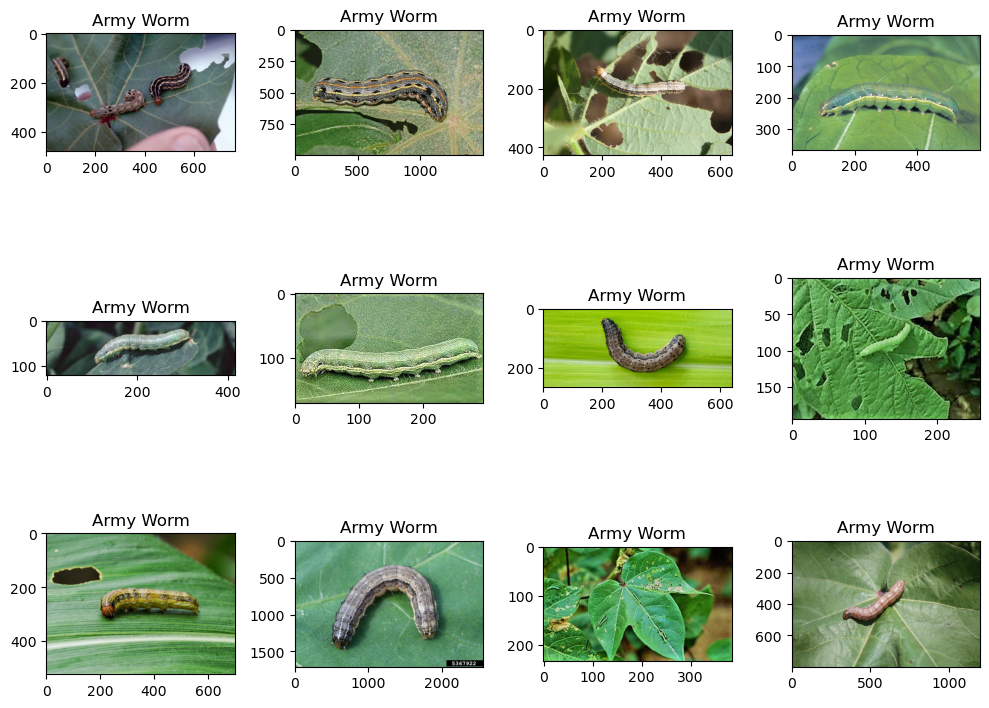

In [7]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [8]:
images,labels=shuffle(images,labels)

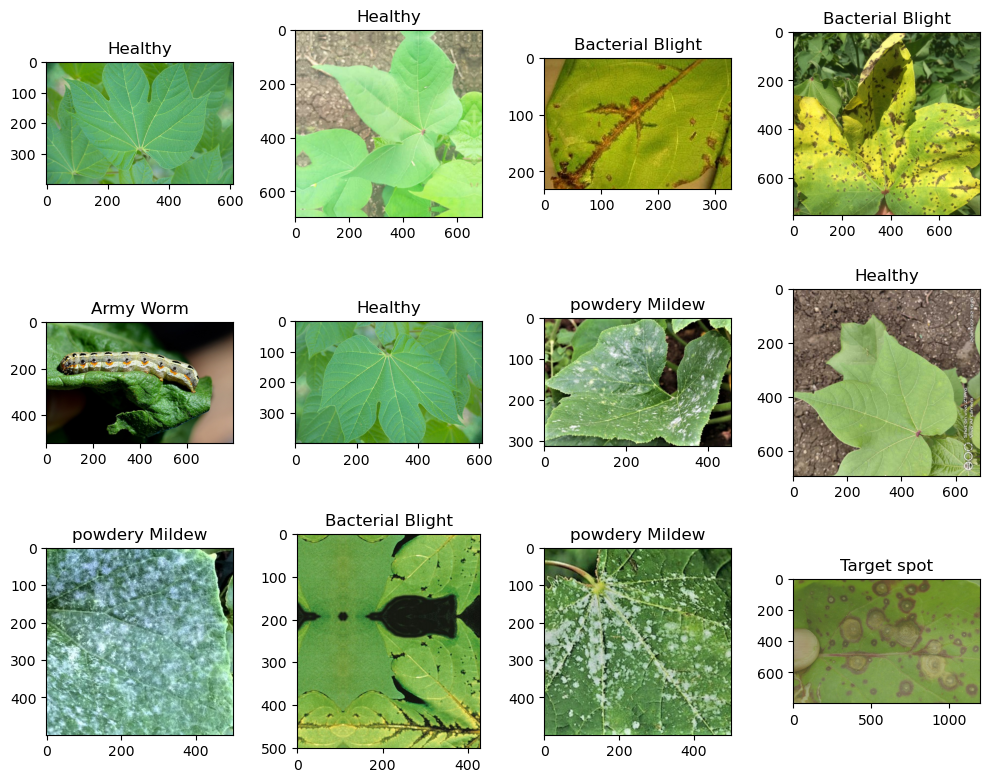

In [9]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [10]:
X=[]
for i in images:
    X.append(resize(i,(224,224,3)))

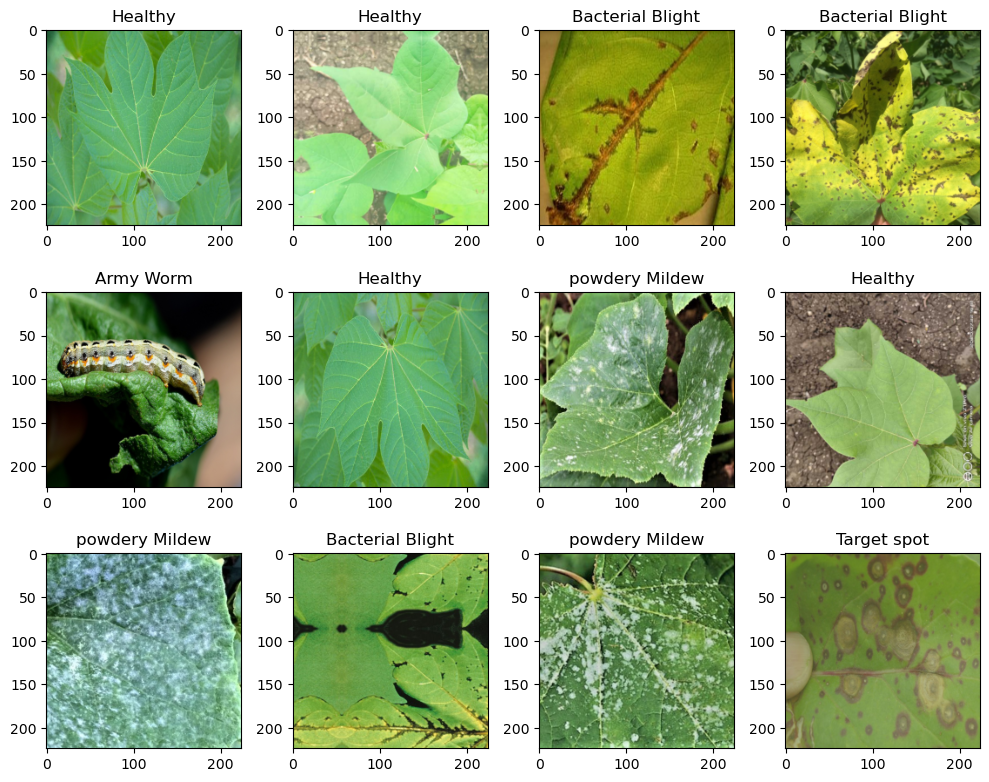

In [11]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [14]:
X=np.array(X)
y=np.array(labels)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [17]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [18]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1f8ed881ab0>

In [19]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [20]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(6, activation = 'softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                910       
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
Total params: 2,340,968
Trainable params: 82,984
Non-trainable params: 2,257,984
_________________________________________________________________


In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
47/47 [==============================] - 29s 467ms/step - loss: 0.8750 - accuracy: 0.6822 - val_loss: 0.3467 - val_accuracy: 0.9250
Epoch 2/10
47/47 [==============================] - 20s 425ms/step - loss: 0.2337 - accuracy: 0.9249 - val_loss: 0.1487 - val_accuracy: 0.9625
Epoch 3/10
47/47 [==============================] - 20s 416ms/step - loss: 0.1224 - accuracy: 0.9707 - val_loss: 0.1127 - val_accuracy: 0.9875
Epoch 4/10
47/47 [==============================] - 20s 420ms/step - loss: 0.0821 - accuracy: 0.9787 - val_loss: 0.0998 - val_accuracy: 0.9750
Epoch 5/10
47/47 [==============================] - 19s 408ms/step - loss: 0.0456 - accuracy: 0.9874 - val_loss: 0.1055 - val_accuracy: 0.9625
Epoch 6/10
47/47 [==============================] - 19s 412ms/step - loss: 0.0366 - accuracy: 0.9907 - val_loss: 0.0987 - val_accuracy: 0.9750
Epoch 7/10
47/47 [==============================] - 20s 428ms/step - loss: 0.0267 - accuracy: 0.9940 - val_loss: 0.0701 - val_accuracy: 0.9875

In [24]:
y_pred=model.predict(X_test)

13/13 [==============================] - 10s 399ms/step


In [25]:
y_pred=[np.argmax(i) for i in y_pred]

In [26]:
accuracy_score(y_test,y_pred)

0.9646464646464646

<Axes: >

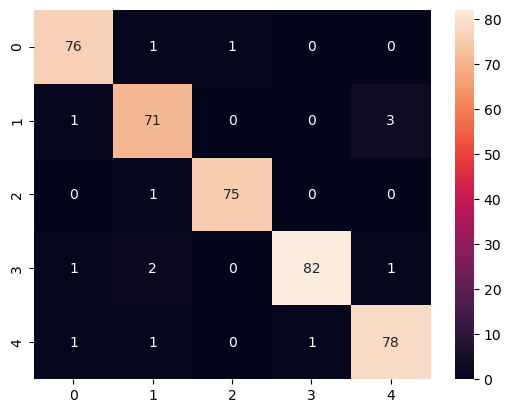

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97        78
           2       0.93      0.95      0.94        75
           3       0.99      0.99      0.99        76
           4       0.99      0.95      0.97        86
           5       0.95      0.96      0.96        81

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396

